#My first project in data analysis and machine learning

**1 - Data analysis**

1.1 - Load the data

1.2 - Manipulating the data

1.3 - Visualizing the data

**2 - Machine Learning**

2.1 -  Test predictions in data input

2.2 Test result prediction

In [10]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
scipy: 1.0.0
numpy: 1.14.0
matplotlib: 2.1.2
pandas: 0.22.0
sklearn: 0.19.1


In [11]:
# Load libraries
import seaborn
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

**1.1 Load the data**

In [12]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = pandas.read_csv(url, names=names)

**1.2 Manipulating the data**

In [13]:
print(dataset.head(5))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [14]:
print(dataset.shape)

(150, 5)


In [15]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


**1.3 Visualizing the data**

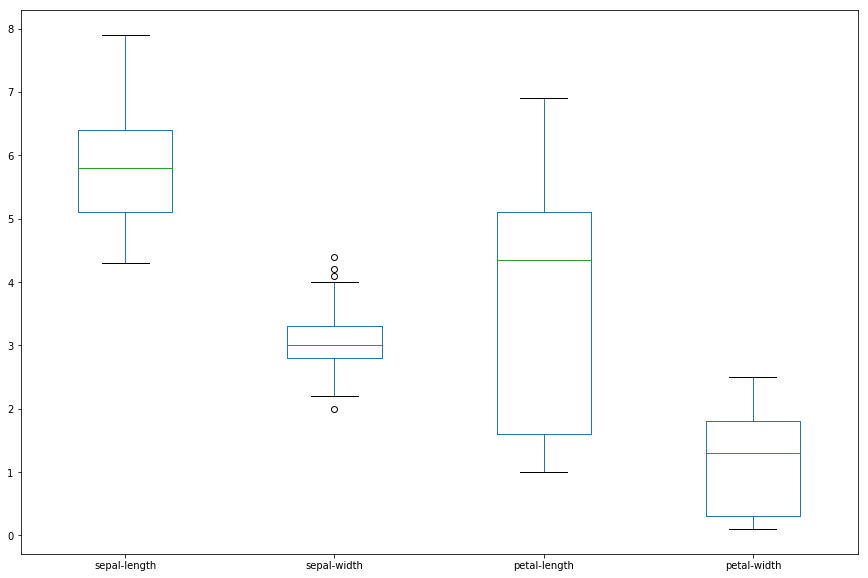

In [16]:
dataset.plot(kind='box', subplots=False, layout=(2,2), sharex=False, sharey=False,figsize=(15,10))
plt.show()

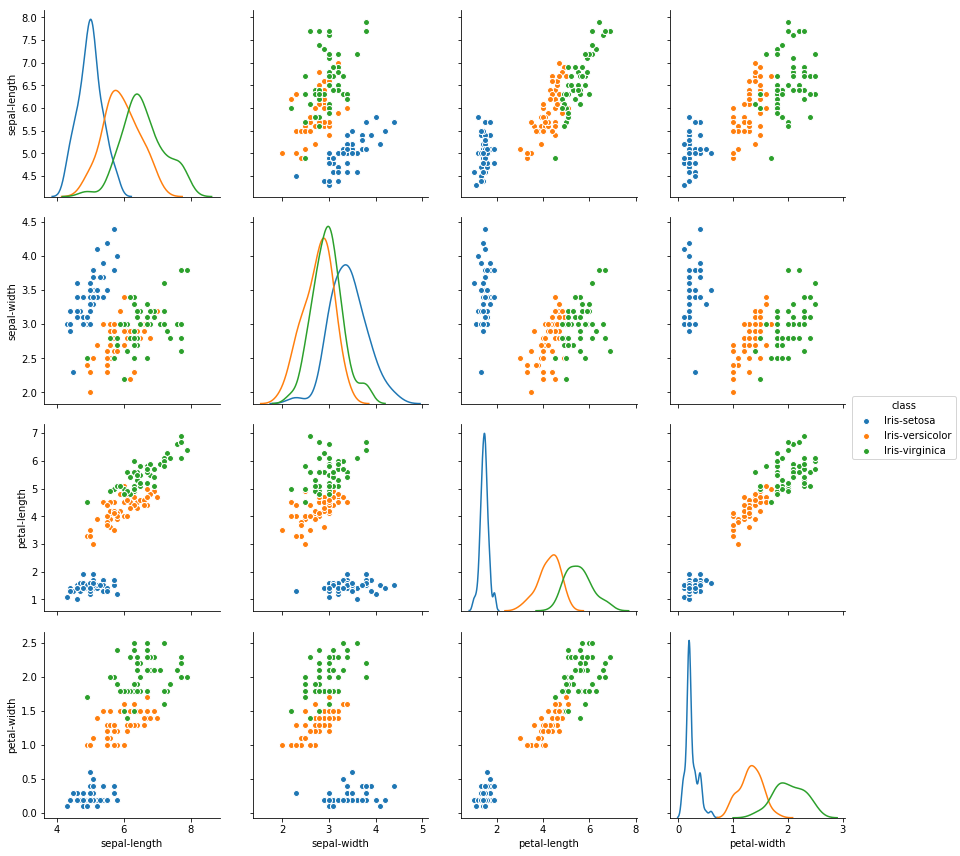

In [17]:
seaborn.pairplot(dataset, hue="class", size=3, diag_kind="kde")
plt.show()

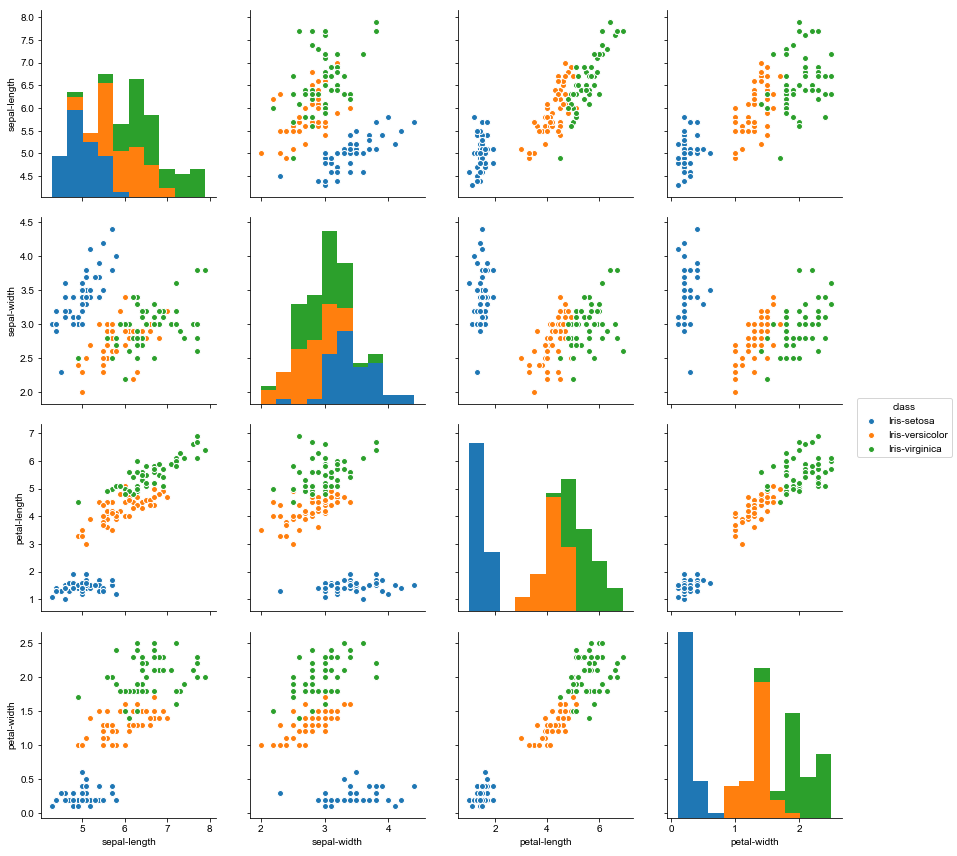

In [18]:
seaborn.pairplot(dataset, hue="class", size = 3)
seaborn.set()

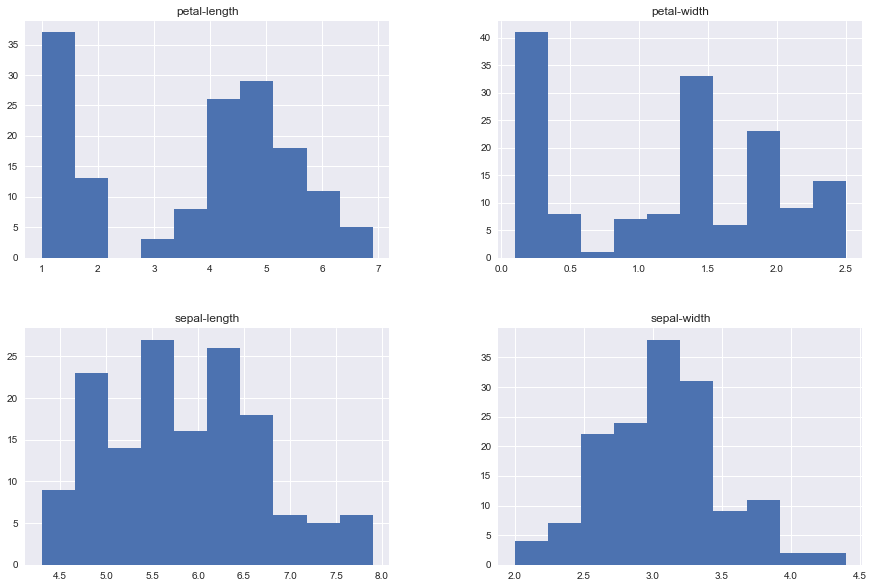

In [19]:
dataset.hist(figsize=(15,10))
plt.show()

**2 Machine Learning**

In [20]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y, test_size=validation_size, 
random_state=seed)

In [21]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

In [22]:

#Here we are testing various predictive algorithms from scikit-learn
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
	cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


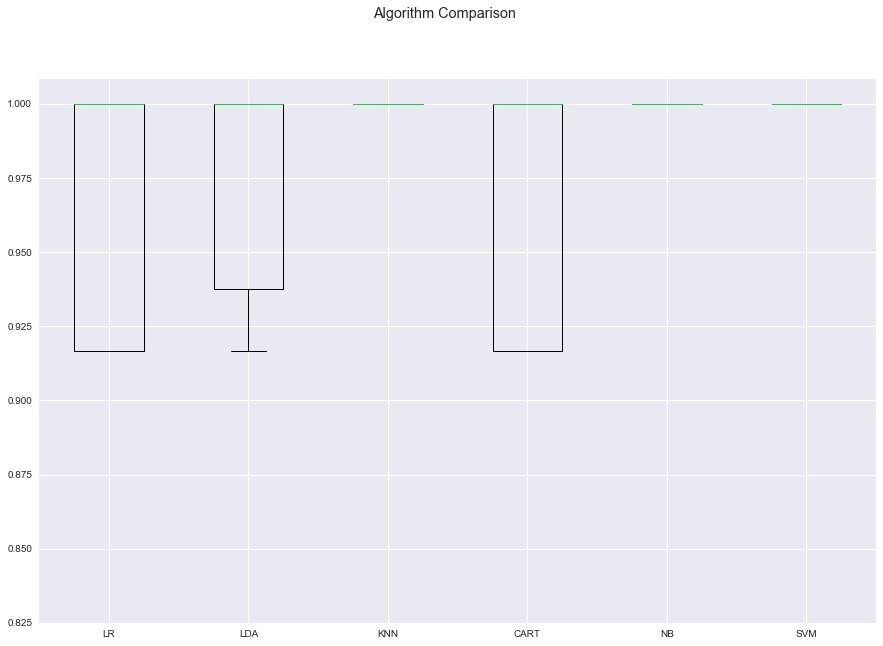

In [23]:
# Compare Algorithms
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [24]:

# Make predictions on validation dataset
svn = SVC()
svn.fit(X_train, Y_train)
predictions = svn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



**2.1 Test predictions in data input**

In [45]:
#Input Vector 
X_new = numpy.array([[6.7,3.0,5.0,1], [3,4,5,1],[5.4,3.9,1.7,0.4]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (3, 4)


In [46]:
prediction = svn.predict(X_new)

**2.1 Test result prediction**

In [47]:
#Prediction of the species from the input vector
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-versicolor' 'Iris-virginica' 'Iris-setosa']


Prediction of the The Iris Flower


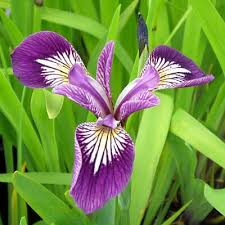

Iris-Versicolor
[6.7 3.  5.  1. ]


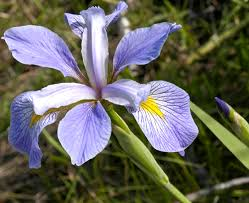

Iris-virginica
[3. 4. 5. 1.]


In [48]:
from IPython.display import Image

print("Prediction of the The Iris Flower")
if prediction[0]== 'Iris-virginica':
    display(Image("virginica.jpg"))
    print("Iris-virginica")
    print(X_new[0])
elif prediction[0] == 'Iris-setosa':
    display(Image("setosas.jpg"))
    print("Iris-Setosa")
    print(X_new[0])
    
else :
    display(Image("versicolor.jpg"))
    print("Iris-Versicolor")
    print(X_new[0])
        
if prediction[1]== 'Iris-virginica':
    display(Image("virginica.jpg"))
    print("Iris-virginica")
    print(X_new[1])
elif prediction[1] == 'Iris-setosa':
    display(Image("setosas.jpg"))
    print("Iris-Setosa")
    print(X_new[1])
    
elif prediction[1] == 'Iris-versicolor':
    display(Image("versicolor.jpg"))
    print("Iris-Versicolor")
    print(X_new[1])
       
    
       
                   

**Thanks!!**